In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from typing import List, Tuple, Union
from dataclasses import dataclass
from scipy.spatial import distance

In [2]:
rad_measure = pd.read_csv("../data/GT/result.csv")
correct_list = []
correct_list.append([2.0,6.5,90])
x = rad_measure['x']
y = rad_measure['y']

In [3]:
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [4]:
def calculate_nearest_i(g, correct_list):
    nearest_i = []
    G = g*g
    d=10/g
    for l in correct_list:
        temp_i = []
        temp_i.append((0,100000))
        for i in range(G):
            temp_x = (i % g)*d + d/2
            temp_y = (i//g)*d + d/2
            temp_dis = calculate_distance(l[0],l[1],temp_x,temp_y)
            if temp_dis < temp_i[0][1]:
                temp_i.clear()
                temp_i.append((i, temp_dis))
            elif temp_dis == temp_i[0][1]:
                temp_i.append((i, temp_dis))
            else:
                pass

        nearest_i.append(temp_i)

    return nearest_i

In [5]:
attenuation = rad_measure['value'][0] / rad_measure['value'][1]
print(attenuation)

0.1013986013986014


In [6]:
rad =[]
for i in range(len(rad_measure)):
    temp_rad = 0
    s_pos = rad_measure['shield'][i]
    for l in correct_list:
        dis = calculate_distance(x[i],y[i],l[0],l[1])
        if s_pos == 'A':
            if x[i] < l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'B':
            if x[i] < l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'C':
            if x[i] > l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'D':
            if x[i] > l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)

    rad.append(temp_rad)
    print(x[i],y[i],rad[i])

1 1 0.29202797202797204
1 1 2.88
1 1 2.88
1 1 2.88
3 1 2.88
3 1 2.88
3 1 2.88
3 1 0.29202797202797204
6 1 1.9459459459459456
6 1 1.9459459459459456
6 1 1.9459459459459456
6 1 0.1973161973161973
9 1 1.1356466876971607
9 1 1.1356466876971607
9 1 1.1356466876971607
9 1 0.11515298581544638
1 2 0.4294529000411354
1 2 4.235294117647059
1 2 4.235294117647059
1 2 4.235294117647059
4 2 3.7113402061855676
4 2 3.7113402061855676
4 2 3.7113402061855676
4 2 0.3763247062216135
5 2 3.0769230769230766
5 2 3.0769230769230766
5 2 3.0769230769230766
5 2 0.31199569661108123
8 2 1.6
8 2 1.6
8 2 1.6
8 2 0.16223776223776226
1 3 0.6887452170471039
1 3 6.7924528301886795
1 3 6.7924528301886795
1 3 6.7924528301886795
3 3 6.7924528301886795
3 3 6.7924528301886795
3 3 6.7924528301886795
3 3 0.6887452170471039
6 3 3.1858407079646014
6 3 3.1858407079646014
6 3 3.1858407079646014
6 3 0.3230397920663407
7 3 2.416107382550336
7 3 2.416107382550336
7 3 2.416107382550336
7 3 0.24498990941943968
1 4 1.258741258741259
1 4

# MLE

### 再急降下法

### b = Aq

In [7]:
#計測値
#b = np.array(list(rad_measure['value']))
b = np.array(rad)
#grid 20*20
g = 40
d = 10/g
G = g*g
q_max = 100
q_init = 1/q_max
q = np.array([q_init]*G)
q = q.astype(float)

[[(1007, 0.1767766952966369), (1008, 0.1767766952966369), (1047, 0.1767766952966369), (1048, 0.1767766952966369)]]
(1007, 0.1767766952966369)
(1008, 0.1767766952966369)
(1047, 0.1767766952966369)
(1048, 0.1767766952966369)


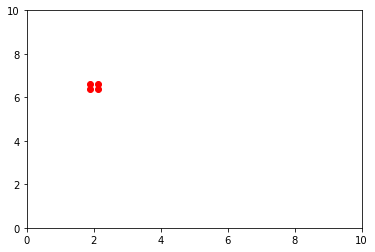

In [8]:
near_i = calculate_nearest_i(g, correct_list)
print(near_i)
plt.xlim(0, 10)
plt.ylim(0, 10)
for l in near_i:
    for ll in l:
        print(ll)
        i = ll[0]
        temp_x = (i % g)*d + d/2
        temp_y = (i//g)*d + d/2
        plt.scatter(temp_x,temp_y, color='red', label='Red Point')

#### A

In [10]:
A = np.zeros((144, G))

for i in range(len(b)):
    m_x = rad_measure['x'][i]
    m_y = rad_measure['y'][i]
    s_pos = rad_measure['shield'][i]
    for j in range(G):
        d = 10 / g
        G_x = (j % g)*d + d/2
        G_y = (j//g)*d + d/2
        dis = calculate_distance(m_x, m_y, G_x, G_y)
        A[i][j] = 1/(dis**2)
        if s_pos == 'A':
            if m_x < G_x and m_y < G_y:
                A[i][j] *= attenuation
                
        elif s_pos == 'B':
            if m_x < G_x and m_y > G_y:
                A[i][j] *= attenuation
        elif s_pos == 'C':
            if m_x > G_x and m_y > G_y:
                A[i][j] *= attenuation
        elif s_pos == 'D':
            if m_x > G_x and m_y < G_y:
                A[i][j] *= attenuation

In [11]:
def score_func(A,b,q):
    b_ave = A.dot(q)
    score = np.sum(b*np.log(b_ave))-np.sum(b_ave)
    return score

def grad_func(A,b,q):
    b_ave = A.dot(q)
    grad_tmp = (b/b_ave)[:,np.newaxis]*A
    grad = grad_tmp.sum(axis=0) - A.sum(axis=0)
    return grad


In [12]:
init_score = score_func(A,b,q)
print(f'initial score:{init_score}')

initial score:1088.666979805232


In [13]:
def Adam(A, b, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m = np.zeros_like(q)
    v = np.zeros_like(q)
    
    for i in range(max_iter):
        t = i + 1
        gradient = grad_func(A, b, q)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        q += learning_rate * m_hat / (np.sqrt(v_hat + epsilon))

        # bound > 0
        q[q<0]=0.0000001
        score = score_func(A,b,q)

        if i%10000==0:
            plt.figure()
            #plt.title(f'iter:{i} score:{score:.5} q_max:{q.max():.3}, q_min:{q.min():.3}')
            plt.imshow(q.reshape(g,g),origin='lower',cmap='Greys')
            plt.colorbar()
            d = 10 / g
            max_q_i = np.argmax(q)
            max_x = (max_q_i % g)*d + d/2
            max_y = (max_q_i//g)*d + d/2
            print(max_q_i,max_x, max_y)
    
    return q

964 1.125 6.125
1088 2.125 6.875
967 1.875 6.125
967 1.875 6.125
967 1.875 6.125
967 1.875 6.125


array([1.e-07, 1.e-07, 1.e-07, ..., 1.e-07, 1.e-07, 1.e-07])

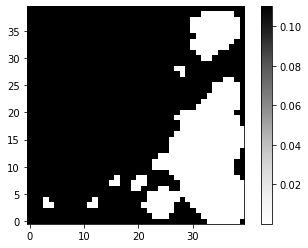

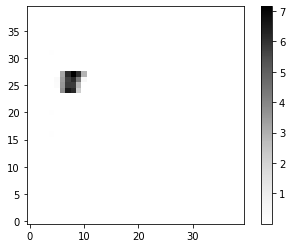

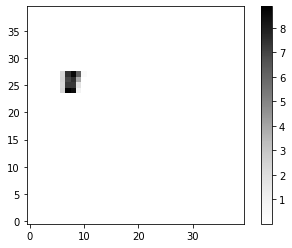

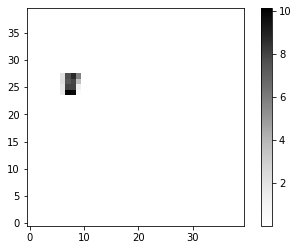

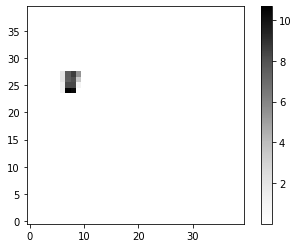

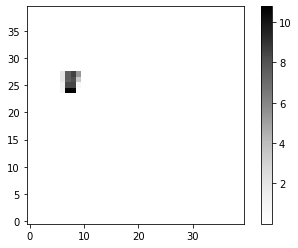

In [14]:
Adam(A, b, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=60000)

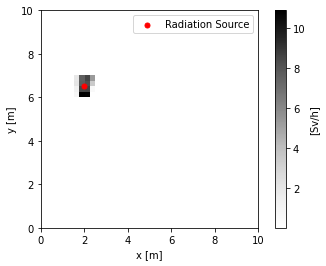

In [15]:
# Reshape q to a 2D grid
q_grid = q.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red',s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

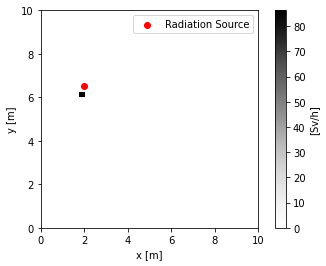

In [39]:
q_grid_new = np.zeros((50, 50))

q_grid_new[5:45,5:45] = q_grid
q_grid_copy = q_grid_new.copy()

for i in range(5,45):
    for j in range(5,45):
        sub_grid = q_grid_new[i-5:i+5,j-5:j+5]
        max_index = np.unravel_index(np.argmax(sub_grid), sub_grid.shape)
        if q_grid_new[i][j] == sub_grid[max_index[0]][max_index[1]]:
            q_grid_new[i][j] += np.sum(sub_grid)

for i in range(50):
    for j in range(50):
        q_grid_new[i][j] -= q_grid_copy[i][j]

restored_grid = q_grid_new[5:45, 5:45]

        # Plot the heatmap using imshow with extent specified
plt.imshow(restored_grid, origin='lower', cmap='Greys',extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale


for l in correct_list:
    plt.scatter(l[0],l[1], color='red', label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

In [38]:
# 2次元リストをNumPy配列に変換
matrix_array = np.array(restored_grid)

# 大きい順に3つの要素の値とインデックスを取得
top3_indices = np.argpartition(matrix_array.flatten(), -3)[-3:]
top3_values = matrix_array.flatten()[top3_indices]

# 大きい順に3つの要素の値とインデックス（(x, y)形式）を表示
for index, value in zip(top3_indices, top3_values):
    x, y = np.unravel_index(index, matrix_array.shape)
    print(f"要素の値: {value}, インデックス: ({x}, {y})")
    G_x = d/2 + d*y
    G_y = d/2 + d*x
    print(G_x,G_y)

要素の値: 0.027151194678886867, インデックス: (20, 19)
4.875 5.125
要素の値: 0.029020959687516244, インデックス: (16, 4)
1.125 4.125
要素の値: 86.28408246883993, インデックス: (24, 7)
1.875 6.125


[[(1007, 0.1767766952966369), (1008, 0.1767766952966369), (1047, 0.1767766952966369), (1048, 0.1767766952966369)]]


Text(0, 0.5, 'y [m]')

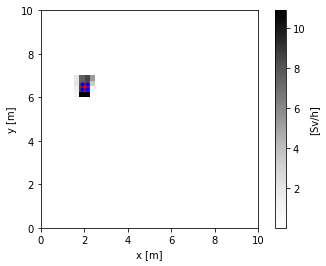

In [16]:
# Reshape q to a 2D grid
q_grid = q.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red',s=50)

near_i = calculate_nearest_i(g, correct_list)
print(near_i)
plt.xlim(0, 10)
plt.ylim(0, 10)
for l in near_i:
    for ll in l:
        i = ll[0]
        temp_x = (i % g)*d + d/2
        temp_y = (i//g)*d + d/2
        plt.scatter(temp_x,temp_y, color='blue',s=10)

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')

In [17]:
sum(q)

86.48361803519197

### 遮蔽無し

In [18]:
rad_ns =[]
x_ns =[]
y_ns =[]
for i in range(len(rad_measure)):
    if i % 4 == 0:
        x_ns.append(rad_measure['x'][i])
        y_ns.append(rad_measure['y'][i])
        temp_rad = 0
        s_pos = rad_measure['shield'][i]
        for l in correct_list:
            dis = calculate_distance(x[i],y[i],l[0],l[1])
            temp_rad += l[2] / (dis**2)

        rad_ns.append(temp_rad)

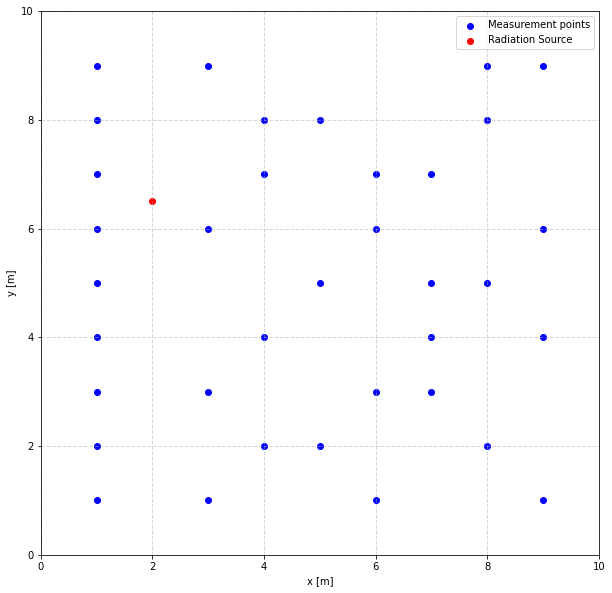

In [35]:
plt.figure(figsize=(10, 10))

plt.scatter(x_ns, y_ns,color='blue',label='Measurement points')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.xlim(0,10)
plt.ylim(0,10)
i = 0
for l in correct_list:
    if i == 0:
        plt.scatter(l[0],l[1], color='red', label='Radiation Source')
    else:
        plt.scatter(l[0],l[1], color='red')
    i += 1

plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.legend()
plt.show()

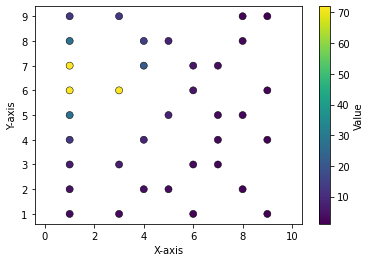

In [19]:

# Create a scatter plot with color-coded values
plt.scatter(x_ns, y_ns, c=rad_ns, cmap='viridis', s=50, edgecolors='k', linewidths=0.5)

# Add a colorbar to show the scale
plt.colorbar(label='Value')

# Set aspect ratio to be equal, making the plot square
plt.axis('equal')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


In [20]:
A_ns = np.zeros((36, G))

for i in range(len(rad_ns)):
    m_x = x_ns[i]
    m_y = y_ns[i]
    for j in range(G):
        d = 10 / g
        G_x = (j % g)*d + d/2
        G_y = (j//g)*d + d/2
        dis = calculate_distance(m_x, m_y, G_x, G_y)
        A_ns[i][j] = 1/(dis**2)

In [21]:
v_ns = np.array(rad_ns)
q_ns = np.array([q_init]*G)
q_ns = q_ns.astype(float)

In [22]:
init_score = score_func(A_ns,v_ns,q_ns)
print(f'initial score:{init_score}')

initial score:458.9390234576253


1083 0.875 6.875
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125
971 2.875 6.125


array([0.00926061, 0.00954339, 0.00993422, ..., 0.01795824, 0.01754072,
       0.01693327])

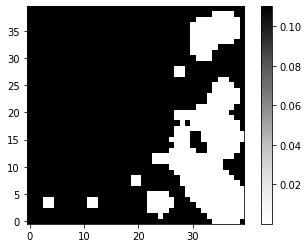

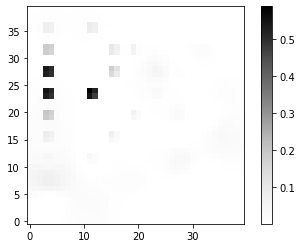

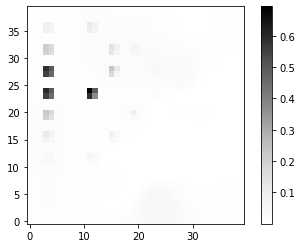

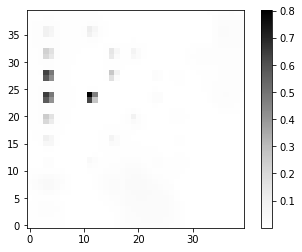

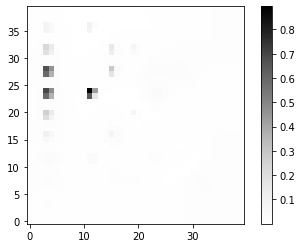

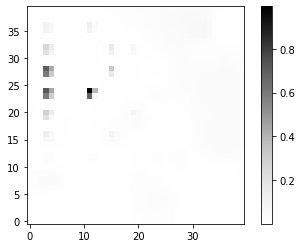

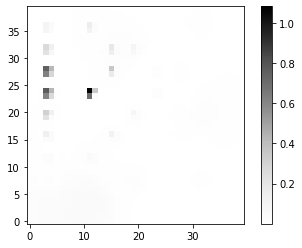

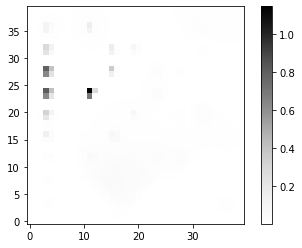

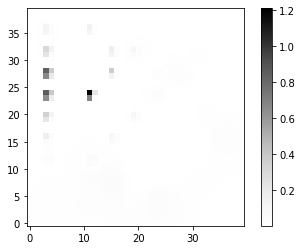

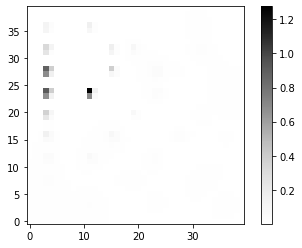

In [23]:
Adam(A_ns, v_ns, q_ns, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=100000)

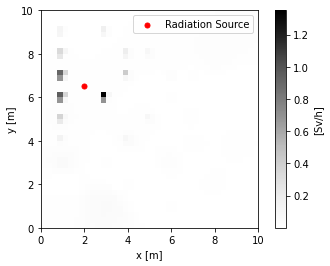

In [24]:
# Reshape q to a 2D grid
q_ns_grid = q_ns.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_ns_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red', s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

In [25]:
print(sum(q_ns))

22.46339628271653


## L1ノルム

In [26]:
def calculate_L1(t,q):
    sum = 0
    for i in range(len(q)):
        sum += abs(t[i]-q[i])

    return sum

In [27]:
t = np.array([0]*G)
near_i = calculate_nearest_i(g, correct_list)
print(near_i)
for j in range(len(correct_list)):
    l = near_i[j]
    print(l)
    z = len(l)
    t_prime = correct_list[j][2] / z
    for i in l:#それぞれの放射線源の最近傍点
        t[i[0]] = t_prime

nearest_x = (1047 % g)*d + d/2
nearest_y = (1047//g)*d + d/2
print(nearest_x,nearest_y)

[[(1007, 0.1767766952966369), (1008, 0.1767766952966369), (1047, 0.1767766952966369), (1048, 0.1767766952966369)]]
[(1007, 0.1767766952966369), (1008, 0.1767766952966369), (1047, 0.1767766952966369), (1048, 0.1767766952966369)]
1.875 6.625


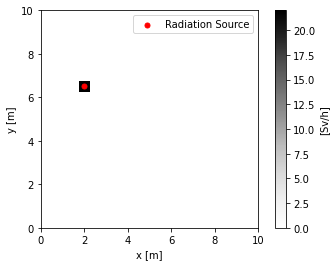

In [28]:
# Reshape q to a 2D grid
t_grid = t.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(t_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red', s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

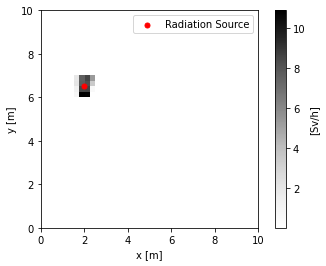

In [29]:
# Reshape q to a 2D grid
q_grid = q.reshape((g, g))

# Plot the heatmap using imshow with extent specified
plt.imshow(q_grid, origin='lower', cmap='Greys', extent=[0, 10, 0, 10])
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

for l in correct_list:
    plt.scatter(l[0],l[1], color='red',s=25,label='Radiation Source')

# Add labels and title
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

In [30]:
print(t[1047],q[1047])

22 7.685125977494784


In [31]:
proposed_l1 = calculate_L1(t,q)
print(proposed_l1)

108.42775473900667


In [32]:
minamoto_l1 = calculate_L1(t,q_ns)
print(minamoto_l1)

110.39927881743586


## NMS

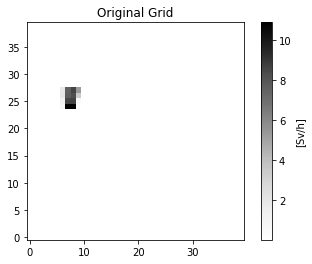

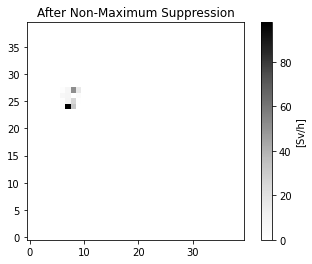

In [33]:
def non_max_suppression(grid, window_size):
    suppressed_grid = np.zeros_like(grid)

    for i in range(grid.shape[0] - window_size + 1):
        for j in range(grid.shape[1] - window_size + 1):
            window = grid[i:i+window_size, j:j+window_size]
            
            # Find the maximum value in the window
            max_value = np.max(window)
            
            # Set the maximum value to the result grid, add others to it
            suppressed_grid[i:i+window_size, j:j+window_size] += (window == max_value) * max_value

    return suppressed_grid

# Apply non-maximum suppression with a 3x3 window
suppressed_result = non_max_suppression(q_grid, window_size=3)

plt.imshow(q_grid, origin='lower', cmap='Greys', interpolation='nearest')
plt.title('Original Grid')
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale
plt.show()

plt.imshow(suppressed_result, origin='lower', cmap='Greys', interpolation='nearest')
plt.title('After Non-Maximum Suppression')
plt.colorbar(label='[Sv/h]')  # Add a colorbar to show the scale

plt.show()

